In [215]:
# Data Wrangling libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import pickle
import missingno
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [216]:
#Read Iris dataset
# columns = ['SepalLengthCm', 'SepalWidthCmh', 'PetalLengthC', 'PetalWidthCm', 'Species'] 
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [217]:
#check shape of dataset
df.shape

(150, 6)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [219]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [220]:
df = df.drop(['Id'], axis=1)

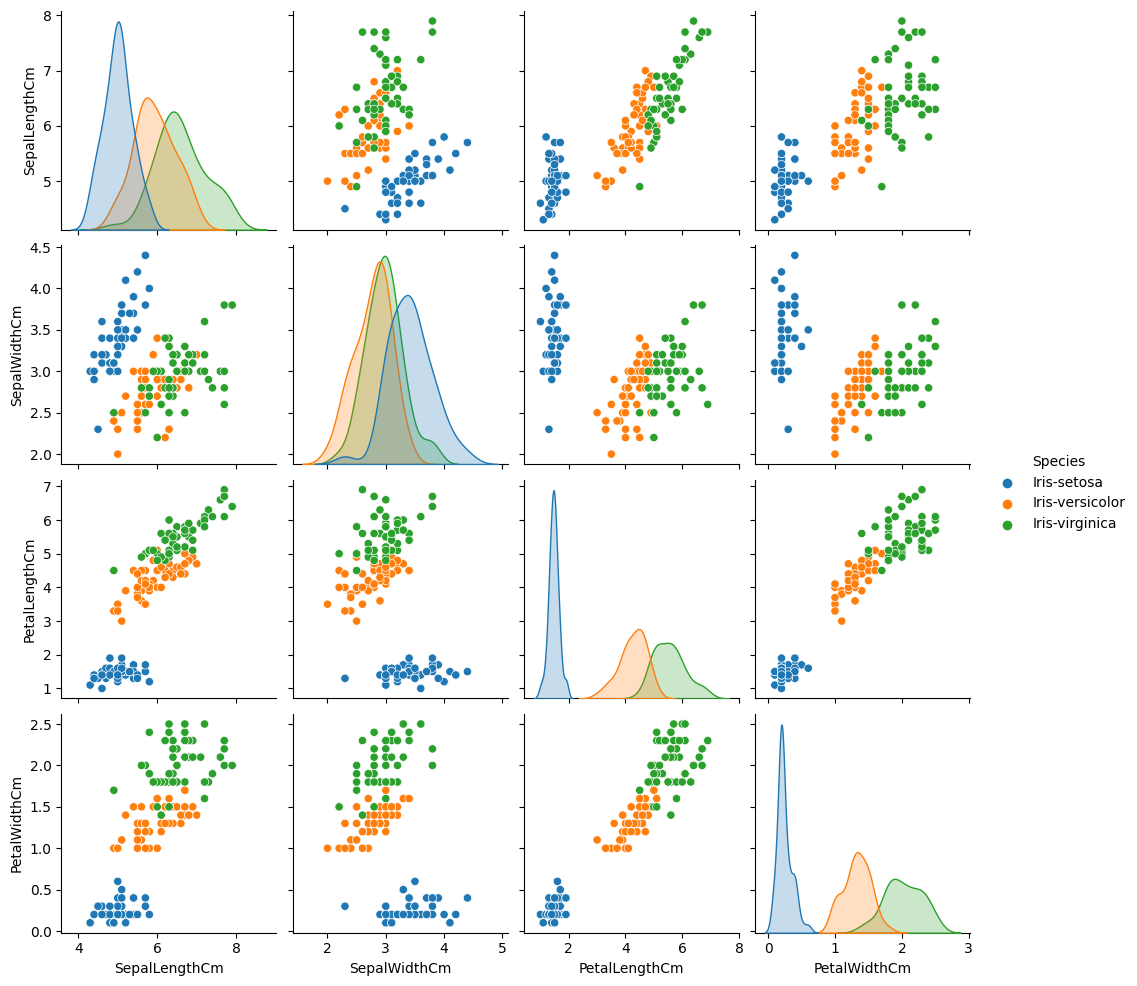

In [221]:
sns.pairplot(df, hue='Species')

In [222]:
#Checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [223]:
n = len(df[df['Species'] == 'Iris-versicolor'])
print("No. of Iris-versicolorr in Dataset:",n)

No. of Iris-versicolorr in Dataset: 50


In [224]:
n1 = len(df[df['Species'] == 'Iris-virginica'])
print("No. of Iris-virginica in Dataset:",n1)

No. of Iris-virginica in Dataset: 50


In [225]:
n2 = len(df[df['Species'] == 'Iris-setosa'])
print("No. of Iris-setosa in Dataset:",n2)

No. of Iris-setosa in Dataset: 50


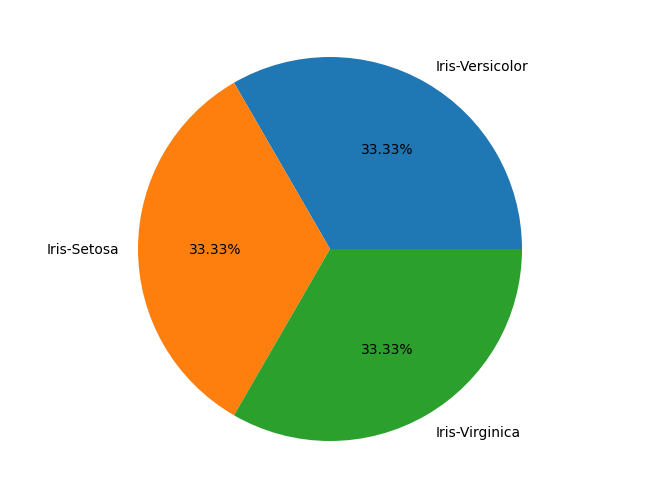

In [226]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Iris-Versicolor', 'Iris-Setosa', 'Iris-Virginica']
s = [n,n1,n2]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

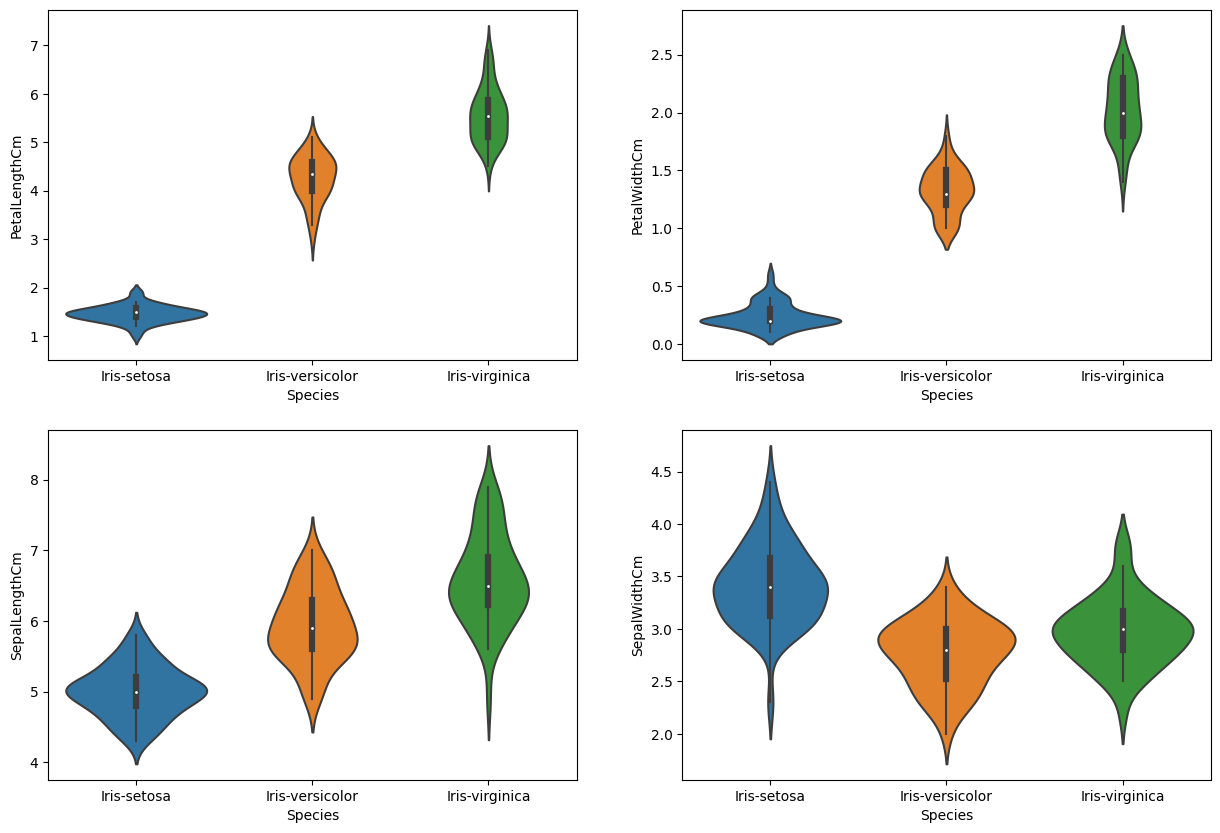

In [227]:
#Checking for outliars
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

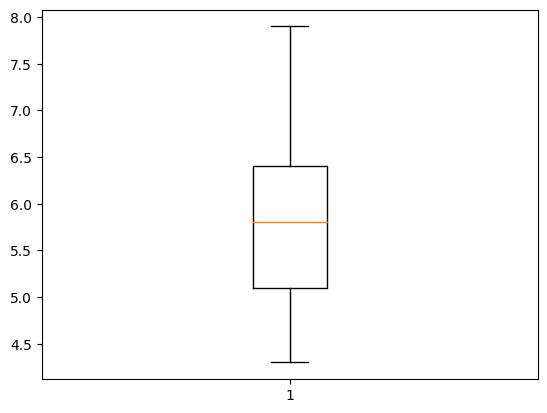

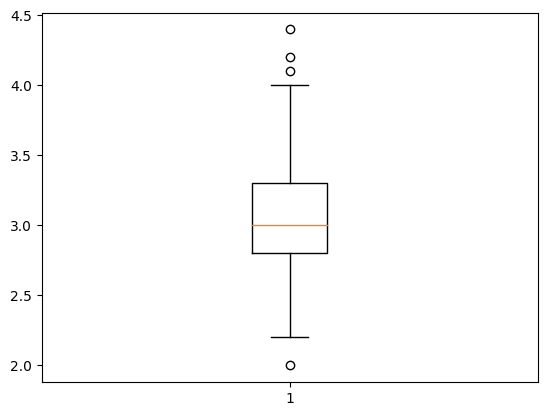

In [228]:

plt.figure(1)
plt.boxplot([df['SepalLengthCm']])
plt.figure(2)
plt.boxplot([df['SepalWidthCm']])
plt.show()

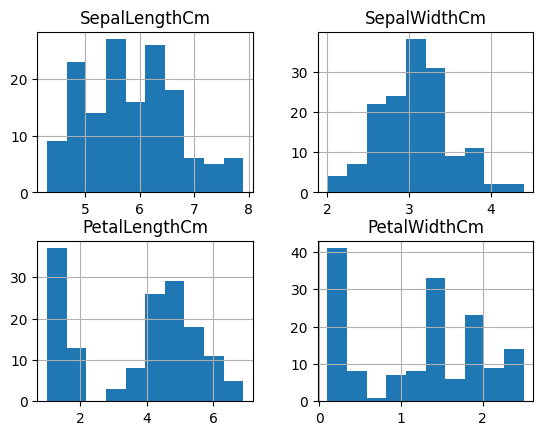

In [229]:
df.hist()
plt.show()

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>], dtype=object)

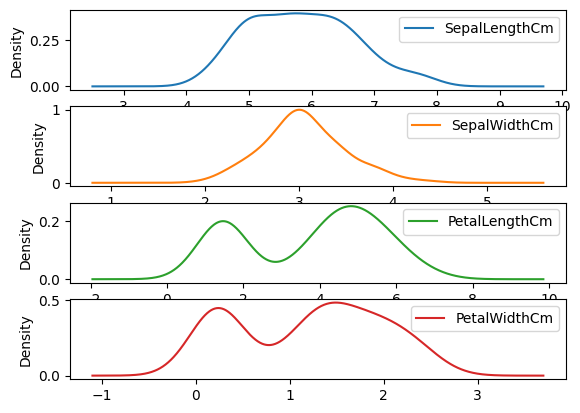

In [230]:
df.plot(kind ='density',subplots = True,sharex = False)

SepalLengthCm       Axes(0.125,0.11;0.168478x0.77)
SepalWidthCm     Axes(0.327174,0.11;0.168478x0.77)
PetalLengthCm    Axes(0.529348,0.11;0.168478x0.77)
PetalWidthCm     Axes(0.731522,0.11;0.168478x0.77)
dtype: object

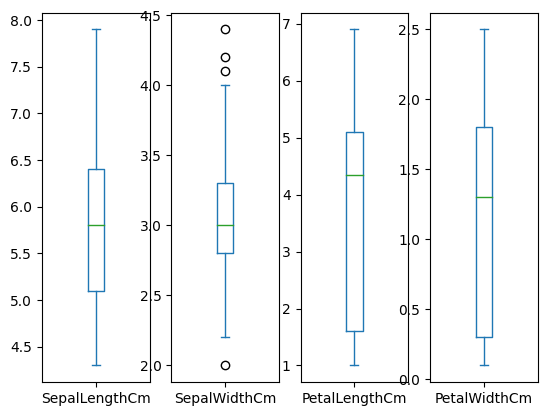

In [231]:
df.plot(kind ='box',subplots = True,sharex = False)

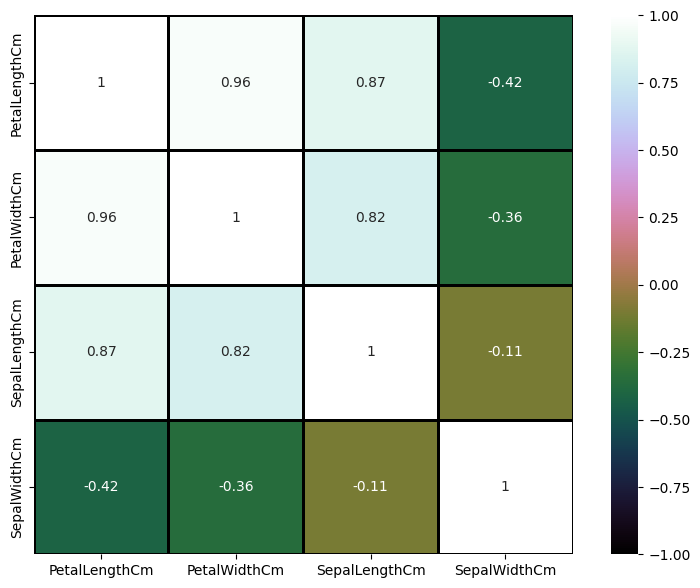

In [232]:
#Heat Maps
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(df[['PetalLengthCm','PetalWidthCm','SepalLengthCm','SepalWidthCm']].corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1)

In [233]:
# Separate features and target  
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [234]:
# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

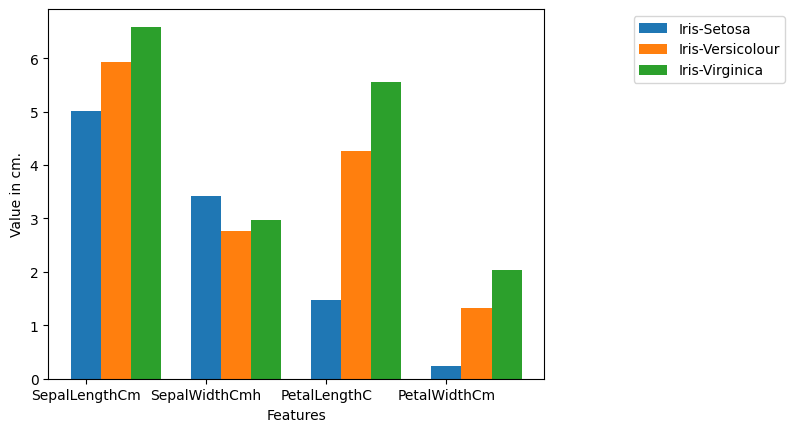

In [235]:
# # Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Iris-Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Iris-Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Iris-Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

In [236]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0, test_size=0.60)

In [237]:
X_train.shape

(60, 4)

In [238]:
X_test.shape

(90, 4)

In [239]:
Y_train.shape

(60,)

In [240]:
Y_test.shape

(90,)

In [241]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
LogisticRegression()
Y_pred=model.predict(X_test)
Y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolo

In [242]:
#Confusion matrix
confusion_matrix(Y_test,Y_pred)
accuracy1=accuracy_score(Y_test,Y_pred)*100
accuracy1

94.44444444444444

In [243]:
#Using KNN Neighbors
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,Y_train)
Y_pred2 = model2.predict(X_test)

accuracy2=accuracy_score(Y_test,Y_pred2)*100
accuracy2

92.22222222222223

In [244]:
#Using GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
Y_pred3 = model3.predict(X_test)

accuracy3=accuracy_score(Y_test,Y_pred3)*100
accuracy3

94.44444444444444

In [245]:
# Support vector machine algorithm
model3 = SVC()
model3.fit(X_train, Y_train)

SVC()

In [246]:
# Predict from the test dataset
predictions = model3.predict(X_test)

# Calculate the accuracy
accuracy4=accuracy_score(Y_test, predictions)*100
accuracy4

93.33333333333333

In [247]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = model3.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


In [248]:
# Save the model

with open('SVM.pickle', 'wb') as f:
    pickle.dump(model3, f)

# Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [249]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN'],
    'Score': [accuracy1,accuracy2,accuracy3,accuracy4]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
94.444444,Logistic Regression
94.444444,Naive Bayes
93.333333,KNN
92.222222,Support Vector Machines


Text(0.5, 1.0, 'Score')

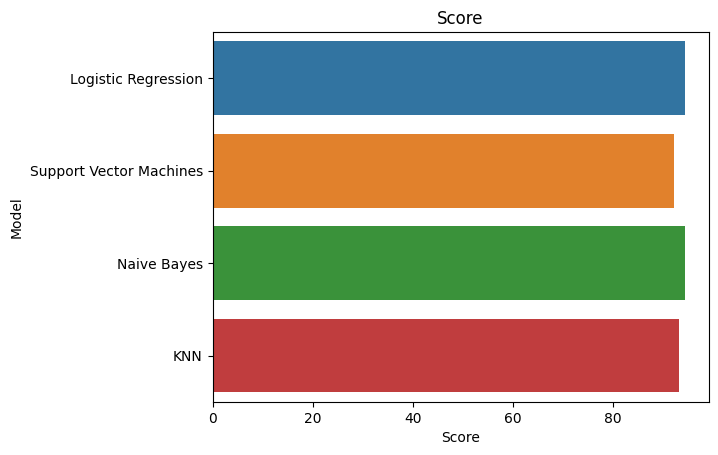

In [250]:
sns.barplot(x='Score', y='Model', data = results)
plt.ylabel('Model')
plt.title('Score')